# Multivariate Time Series: VAR, VECM, SVAR, dan ARDL

## 3.1 VAR dan VECM

In [1]:
install.packages("urca")
install.packages("vars")

Installing package into 'C:/Users/hisbi/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'urca' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'urca'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\hisbi\AppData\Local\R\win-library\4.4\00LOCK\urca\libs\x64\urca.dll to C:\Users\hisbi\AppData\Local\R\win-library\4.4\urca\libs\x64\urca.dll: Permission denied"
Warning message:
"restored 'urca'"



The downloaded binary packages are in
	C:\Users\hisbi\AppData\Local\Temp\RtmpiIV4PL\downloaded_packages


Installing package into 'C:/Users/hisbi/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)

also installing the dependency 'strucchange'




package 'strucchange' successfully unpacked and MD5 sums checked
package 'vars' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\hisbi\AppData\Local\Temp\RtmpiIV4PL\downloaded_packages


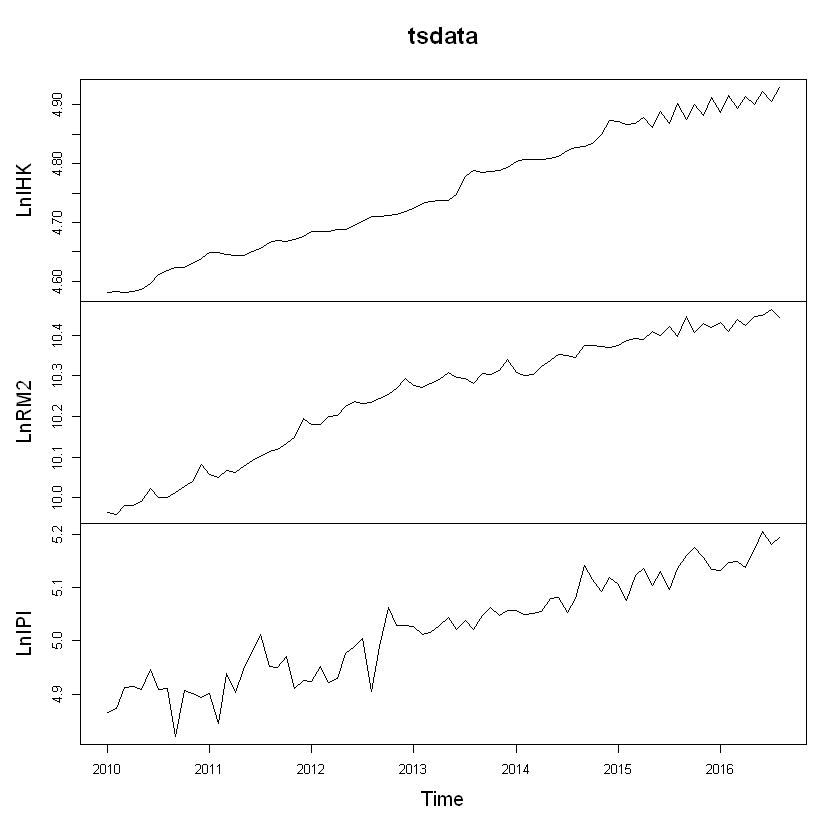

In [8]:
library(readxl)
data1 <- read_excel("D:\\Repositori\\R-tutorial\\data - R IPB\\Bab 4\\VECM.xlsx")
# Konversi data menjadi data time series
tsdata <- data1[,c(-1,-2,-3,-4)]
tsdata <- ts(tsdata, start = c(2010,1),frequency = 12)
plot(tsdata)

### 3.1.1 Identifikasi

In [10]:
# Uji Stationeritas
library(aTSA)
adf.test(tsdata[,"LnIHK"])
adf.test(tsdata[,"LnRM2"])
adf.test(tsdata[,"LnIPI"])


Attaching package: 'aTSA'


The following object is masked from 'package:graphics':

    identify




Augmented Dickey-Fuller Test 
alternative: stationary 
 
Type 1: no drift no trend 
     lag  ADF p.value
[1,]   0 3.25    0.99
[2,]   1 7.29    0.99
[3,]   2 3.75    0.99
[4,]   3 5.84    0.99
Type 2: with drift no trend 
     lag    ADF p.value
[1,]   0 -0.506   0.869
[2,]   1 -0.541   0.856
[3,]   2 -0.727   0.791
[4,]   3 -0.914   0.725
Type 3: with drift and trend 
     lag   ADF p.value
[1,]   0 -5.31  0.0100
[2,]   1 -2.02  0.5601
[3,]   2 -3.33  0.0732
[4,]   3 -1.77  0.6648
---- 
Note: in fact, p.value = 0.01 means p.value <= 0.01 
Augmented Dickey-Fuller Test 
alternative: stationary 
 
Type 1: no drift no trend 
     lag  ADF p.value
[1,]   0 3.09    0.99
[2,]   1 4.89    0.99
[3,]   2 4.21    0.99
[4,]   3 4.52    0.99
Type 2: with drift no trend 
     lag   ADF p.value
[1,]   0 -1.53   0.509
[2,]   1 -2.12   0.284
[3,]   2 -2.04   0.315
[4,]   3 -2.39   0.177
Type 3: with drift and trend 
     lag   ADF p.value
[1,]   0 -2.31   0.441
[2,]   1 -1.50   0.776
[3,]   2 -1.36  

In [11]:
# Uji Stationeritas
library(aTSA)
adf.test(diff(tsdata[,"LnIHK"]))
adf.test(diff(tsdata[,"LnRM2"]))
adf.test(diff(tsdata[,"LnIPI"]))

Augmented Dickey-Fuller Test 
alternative: stationary 
 
Type 1: no drift no trend 
     lag    ADF p.value
[1,]   0 -15.36    0.01
[2,]   1  -3.52    0.01
[3,]   2  -4.20    0.01
[4,]   3  -2.61    0.01
Type 2: with drift no trend 
     lag    ADF p.value
[1,]   0 -21.22    0.01
[2,]   1  -5.37    0.01
[3,]   2  -7.78    0.01
[4,]   3  -5.55    0.01
Type 3: with drift and trend 
     lag    ADF p.value
[1,]   0 -21.09    0.01
[2,]   1  -5.36    0.01
[3,]   2  -7.79    0.01
[4,]   3  -5.59    0.01
---- 
Note: in fact, p.value = 0.01 means p.value <= 0.01 
Augmented Dickey-Fuller Test 
alternative: stationary 
 
Type 1: no drift no trend 
     lag    ADF p.value
[1,]   0 -11.73    0.01
[2,]   1  -5.61    0.01
[3,]   2  -4.49    0.01
[4,]   3  -3.31    0.01
Type 2: with drift no trend 
     lag    ADF p.value
[1,]   0 -14.27    0.01
[2,]   1  -7.53    0.01
[3,]   2  -6.83    0.01
[4,]   3  -5.62    0.01
Type 3: with drift and trend 
     lag    ADF p.value
[1,]   0 -14.60    0.01
[2,]   

#### 3.1.1.1 Uji Lag Optimum

In [12]:
library(urca)
library(vars)
# Lag Optimum
VARselect(tsdata, lag.max = 10)

Loading required package: MASS

Loading required package: strucchange

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: sandwich

Loading required package: lmtest


Attaching package: 'vars'


The following object is masked from 'package:aTSA':

    arch.test




,1,2,3,4,5,6,7,8,9,10
AIC(n),-2.454158e+01,-2.517704e+01,-2.527724e+01,-2.529876e+01,-2.531948e+01,-2.531117e+01,-2.509185e+01,-2.516992e+01,-2.557138e+01,-2.549790e+01
HQ(n),-2.438847e+01,-2.490910e+01,-2.489447e+01,-2.480116e+01,-2.470705e+01,-2.458391e+01,-2.424976e+01,-2.421299e+01,-2.449963e+01,-2.431131e+01
SC(n),-2.415612e+01,-2.450249e+01,-2.431360e+01,-2.404603e+01,-2.377765e+01,-2.348025e+01,-2.297184e+01,-2.276081e+01,-2.287319e+01,-2.251061e+01
FPE(n),2.197302e-11,1.165805e-11,1.058765e-11,1.043683e-11,1.034191e-11,1.060910e-11,1.353419e-11,1.293440e-11,9.038835e-12,1.028471e-11


#### 3.1.1.2 Uji Kointegrasi

In [15]:
# Uji Kointegrasi
cointest_eigen = ca.jo(tsdata, K=2, type="eigen", ecdet = "const", spec = "longrun")
summary(cointest_eigen)


###################### 
# Johansen-Procedure # 
###################### 

Test type: maximal eigenvalue statistic (lambda max) , without linear trend and constant in cointegration 

Eigenvalues (lambda):
[1]  5.404113e-01  2.481996e-01  6.245216e-02 -2.633450e-15

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 2 |  5.03  7.52  9.24 12.97
r <= 1 | 22.25 13.75 15.67 20.20
r = 0  | 60.64 19.77 22.00 26.81

Eigenvectors, normalised to first column:
(These are the cointegration relations)

           LnIHK.l2    LnRM2.l2   LnIPI.l2   constant
LnIHK.l2  1.0000000  1.00000000  1.0000000  1.0000000
LnRM2.l2 -0.1153114  0.08719842 -1.0510635 -0.6085127
LnIPI.l2 -0.8107822 -1.31468643  0.2406645  0.1913803
constant  0.4060887  0.96758544  4.8089173  0.5277719

Weights W:
(This is the loading matrix)

           LnIHK.l2    LnRM2.l2    LnIPI.l2      constant
LnIHK.d -0.07391103 -0.02494780 -0.03114995 -2.277816e-13
LnRM2.d -0.06399547  0.08952368  0.07

Hasil uji disimpan dalam cointest_eigen
Informasi penting terdapat pada :
r=0 yang menandakan bahwa tidak terdapat kointegrasi pada 
hipotesis nilai r<=1 terdapat kointegrasi
hipotesis nilai r<=2 terdapat maksimal 2 kointegrasi

Nilai tes dibandingkan dengan nilai statistik pada signifikansi 5%


### 3.1.2 Estimasi

In [18]:
# Estimasi VECM
modelvecm = cajorls(cointest_eigen)
summary(modelvecm$rlm)

Response LnIHK.d :

Call:
lm(formula = LnIHK.d ~ ect1 + LnIHK.dl1 + LnRM2.dl1 + LnIPI.dl1 - 
    1, data = data.mat)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.015021 -0.005668 -0.001157  0.003871  0.027827 

Coefficients:
          Estimate Std. Error t value Pr(>|t|)    
ect1      -0.07391    0.01199  -6.166 3.37e-08 ***
LnIHK.dl1 -0.70491    0.10168  -6.933 1.31e-09 ***
LnRM2.dl1  0.08470    0.06861   1.234    0.221    
LnIPI.dl1 -0.01593    0.02695  -0.591    0.556    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.008005 on 74 degrees of freedom
Multiple R-squared:  0.6302,	Adjusted R-squared:  0.6102 
F-statistic: 31.53 on 4 and 74 DF,  p-value: 2.518e-15


Response LnRM2.d :

Call:
lm(formula = LnRM2.d ~ ect1 + LnIHK.dl1 + LnRM2.dl1 + LnIPI.dl1 - 
    1, data = data.mat)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.030921 -0.011339  0.001549  0.010970  0.044395 

Coefficients:
          E

### 3.1.3 Evaluasi

### 3.1.4 Forecast